In [ ]:
# Lorenz system simulation --> system of ODEs which generate chaos under
# disturbed inital conditions

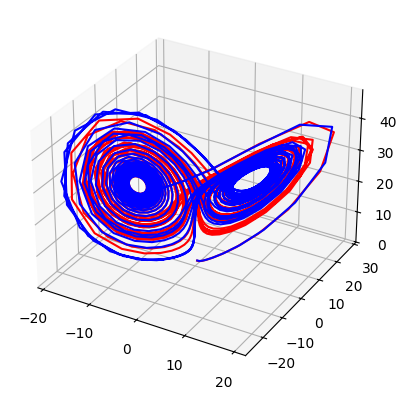

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint

sigma = 10 # Prandtl's Number
beta = 8/3 # Physical dimension
rho = 28   # Rayleigh number (also seen in fluiddynamics)
def systemOfODES(vector, t, sigma, beta, rho):
    x, y, z = vector
    dVector = [
        sigma*(y - x),
        x*(rho - z) - y,
        x*y - beta*z
    ]
    return dVector

position0_1 = [0.0, 1.0, 1.0] # Position at t = 0
position0_2 = [0.0, 1.1, 1.0] # 2nd initial position
timePoints = np.linspace(0,40,1001)
# Solving systems of ODEs

positions1 = odeint(systemOfODES, position0_1, timePoints, args=(sigma, beta, rho))
xSol1, ySol1, zSol1 = positions1[:,0], positions1[:,1], positions1[:,2]

positions2 = odeint(systemOfODES, position0_2, timePoints, args=(sigma, beta, rho))
xSol2, ySol2, zSol2 = positions2[:,0], positions2[:,1], positions2[:,2]


# Plotting
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

lorenzPlt1, = ax.plot(xSol1, ySol1, zSol1, 'red', label=f'Position 0 of 1st: {position0_1}')
lorenzPlt2, = ax.plot(xSol2, ySol2, zSol2, 'blue', label=f'Position 0 of 2nd: {position0_2}')

def update(frame):
    
    lowerLim = max(0, frame - 100) # Here, frame = 25, so min/lower limit = -75

    xCurrent_1 = xSol1[lowerLim:frame+1]
    yCurrent_1 = ySol1[lowerLim:frame+1]
    zCurrent_1 = zSol1[lowerLim:frame+1]

    xCurrent_2 = xSol2[lowerLim:frame+1]
    yCurrent_2 = ySol2[lowerLim:frame+1]
    zCurrent_2 = zSol2[lowerLim:frame+1]


    lorenzPlt1.set_data(xCurrent_1, yCurrent_1)
    lorenzPlt1.set_3d_properties(zCurrent_1)

    lorenzPlt2.set_data(xCurrent_2, yCurrent_2)
    lorenzPlt2.set_3d_properties(zCurrent_2)
    

    return lorenzPlt1, lorenzPlt2
    
    
animation = FuncAnimation(fig, update, frames=len(timePoints), interval=25, blit=False)

plt.show()
